In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Đọc bộ dữ liệu mẫu

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("/content/drive/MyDrive/DoAnTienXuLiDuLieu/Dataset/train.xlsx")

In [4]:
data.columns

Index(['channelId', 'videoId', 'title', 'Description', 'ChannelViewCount',
       'subscriberCount', 'viewCount', 'likeCount', 'Duration', 'label',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 10', 'Unnamed: 11'], axis = 1)
data.head()

,channelId,videoId,title,Description,ChannelViewCount,subscriberCount,viewCount,likeCount,Duration,label
0,UCO30VRs-k0GJwGxxB5auuiw,H8kDunxpN2Q,Khám phá: phương tiện giao thông đường hàng không,NaN,1.470000e+02,0.0,33.0,0.0,0:04:04,Autos & Vehicles
1,UC2eBFf0HBOGFrVb6-nVlR9A,8dHszZGjXpw,Khi Các Đại Boss Mang Tâm Hồn Chúa Hề | Siêu ...,Chào mừng các bạn đến Siêu Thú Cưng ! Nơi chún...,3.655031e+07,NaN,19630.0,293.0,0:05:43,Pets & Animals
2,UCIg56SgvoZF8Qg0Jx_gh6Pg,XFBICTSiae0,Tin An Ninh Trật tự Nóng Nhất 24h Trưa 30/05/2...,ANTV | Tin tức 24h nóng nhất trên ANTV: Tin An...,2.479959e+09,5740000.0,43575.0,114.0,0:15:19,News & Politics
3,UCUImrH1q_rgmw65lRSoIB_A,k7DFDgtGcKQ,Hưng Troll | Thử Thách Người Cuối Cùng Ngừng Ă...,Facebook chính của Tôi: https://www.facebook.c...,6.463587e+08,1200000.0,253590.0,4847.0,0:24:28,People & Blogs
4,UCrDx2BcNbzC61uVXMrmuzgw,e4SfBkLXqSU,Học tiếng Nhật online - Ngữ pháp N5 bài 4 - S...,Kênh Youtube chuyên đăng tải các video chia sẻ...,4.364570e+07,340000.0,148686.0,1540.0,0:47:50,Education


## Mã hóa nhãn

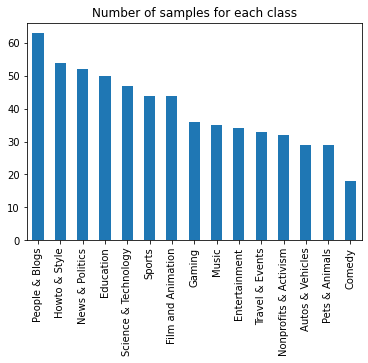

In [6]:
data.label.value_counts().sort_values(
    ascending=False).plot(
        kind='bar',
        y='Number of Samples',
        title='Number of samples for each class')

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.label = le.fit_transform(data.label)
data.sample(5)

,channelId,videoId,title,Description,ChannelViewCount,subscriberCount,viewCount,likeCount,Duration,label
128,UCrSZZYJyO4FNLFHpqZu226Q,6y1G_yfcGLk,Chương trình dạy học trên truyền hình - Khối 1...,Chương trình dạy học trên truyền hình - Khối 1...,11148408.0,52900.0,2498.0,16.0,1:20:42,2
557,UCeXI35OFMmcV5llqyXRkk9g,QSK1ugMDP_k,Tips ÔN THI CUỐI KỲ PHÚT CHÓT LẤY 10 ĐIỂM 💯| C...,"Vậy là kì thi cuối kỳ 2 sắp đến rồi, mọi người...",3691858.0,78400.0,154879.0,10722.0,0:14:04,10
216,UC-AJnWGWhPt3ReFnvzRZ-Kg,Ix5v_mbw_dg,5 mẹo đơn giản để có tư duy logic,Tư duy và diễn đạt logic là điều mà rất nhiều ...,189977423.0,1560000.0,873024.0,37977.0,0:13:17,6
389,UCzAG--_JQ9WKjxqW2f6FX2g,Mckw7Un_Pt8,MÈN ĐÉT ƠI - Tập 1 | Phim Hài Tết | Võ Tấn Phá...,Phim Hài Tết 2022 | MÈN ĐÉT ƠI - Tập 1 | Võ Tấ...,125623679.0,457000.0,2972683.0,42199.0,0:31:22,1
98,UCmBT5CqUxf3-K5_IU9tVtBg,YKCeC3kjRJ4,Tổng Bí Thư Nguyễn Phú Trọng Chủ Trì Họp Bộ Ch...,"VNEWS - Sáng 11/3, tại Trụ sở Trung ương Đảng,...",372529726.0,862000.0,4931.0,35.0,0:05:44,8


Giá trị mã hóa và nhãn tương ứng:

In [8]:
count = 0
for item in le.classes_:
  print(f'{count}: {item}')
  count+=1

0: Autos & Vehicles
1: Comedy
2: Education
3: Entertainment
4: Film and Animation
5: Gaming
6: Howto & Style
7: Music
8: News & Politics
9: Nonprofits & Activism
10: People & Blogs
11: Pets & Animals
12: Science & Technology
13: Sports
14: Travel & Events


## Gom cột tiêu đề và mô tả, tiền xử lí

In [9]:
data.Description = data.Description.fillna(" ")

In [10]:
import re 

data["Feature"] = data.title.astype(str) + data.Description.astype(str)
data["Feature"] = data["Feature"].map(lambda x: re.sub(r'[^\w\s]'," ",re.sub(r'\d+', '', x)))

In [11]:
data.sample(5)

,channelId,videoId,title,Description,ChannelViewCount,subscriberCount,viewCount,likeCount,Duration,label,Feature
161,UC_oLU-rj8X4NBCVh2h4suNA,cMlZWSvrNxU,[ SCHOOL VLOG ] #1 | A day of VietNam univers...,Hôm nay là video về một ngày đi học trong nhữn...,91276.0,1940.0,34960.0,922.0,0:07:19,10,SCHOOL VLOG A day of VietNam universi...
366,UC18dyIDxrWnhADDlyiV6UxA,aGf0Aemqu5U,Một Thế Vận Hội Olympic an toàn,ANTĐ - Thế Vận Hội lần này sẽ không bị đe dọa ...,37137764.0,24300.0,99.0,1.0,0:01:01,13,Một Thế Vận Hội Olympic an toànANTĐ Thế Vận ...
176,UCWE41Zsrn21L-J5yFwQROjg,fKOgFvTEkhg,Tổng hợp những kiến thức thú vị - Tập 2 | Nhữn...,trithucnhanloai #kienthucthuvi Nội dung trong ...,18080229.0,264000.0,180395.0,1296.0,1:01:42,12,Tổng hợp những kiến thức thú vị Tập Những...
19,UCdFi5vDpKZ8VuArXi2sgI0A,TV7awHbqF3Q,ĐI PHÚ QUỐC MÙA COVID | Kinh nghiệm đi du lịch...,"Tranh thủ mấy ngày nghỉ cuối tuần, mình và bé ...",44367879.0,461000.0,43092.0,749.0,0:16:07,14,ĐI PHÚ QUỐC MÙA COVID Kinh nghiệm đi du lịch...
15,UCnxrU4F0ddKn7NL0KsCHZ_w,B2PO8k6MqHc,Tập Nói Sớm - Giọng miền Nam - Phương tiện gia...,DẠY TRẺ THÔNG MINH SỚM. Tập nói sớm. Học nói s...,101470176.0,176000.0,30237.0,NaN,0:04:48,2,Tập Nói Sớm Giọng miền Nam Phương tiện gia...


## Phân tích các n-grams của bộ dữ liệu

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(ngram_range=(1, 3))
labels = data.label
features_title = tfidf_title.fit_transform(data["Feature"])
print('Title + Discription Features Shape: ' + str(features_title.shape))

Title + Discription Features Shape: (600, 28759)


In [13]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(trigrams[-N:])))
    print("\n")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Autos & Vehicles':
Most correlated unigrams:
------------------------------
. exciter
. tiện
. đẹp
. tô
. xe
Most correlated bigrams:
------------------------------
. hàng không
. đường hàng
. thông đường
. phương tiện
. xe đẹp


Most correlated bigrams:
------------------------------
. cà khịa racing
. những phương tiện
. trong tương lai
. giao thông đường
. đường hàng không




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Comedy':
Most correlated unigrams:
------------------------------
. tết
. trấn
. hoài
. kịch
. hài
Most correlated bigrams:
------------------------------
. linh chí
. chí tài
. hài tết
. hoài linh
. hài kịch


Most correlated bigrams:
------------------------------
. tết mới nhất
. hài tết mới
. hài hoài linh
. hoài linh chí
. linh chí tài




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Education':
Most correlated unigrams:
------------------------------
. dạy
. giảng
. học
. tiếng
. bài
Most correlated bigrams:
------------------------------
. dạy học
. khóa học
. giáo dục
. học tiếng
. tiếng anh


Most correlated bigrams:
------------------------------
. dẫn học sinh
. bài giảng dạy
. giảng dạy học
. nghe tiếng anh
. học tiếng anh




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Entertainment':
Most correlated unigrams:
------------------------------
. full
. trường
. sĩ
. âm
. gameshow
Most correlated bigrams:
------------------------------
. âm nhạc
. mùa tập
. đấu trường
. ca sĩ
. trường âm


Most correlated bigrams:
------------------------------
. nhật kim anh
. mùa tập full
. nụ cười xuân
. đấu trường âm
. trường âm nhạc




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Film and Animation':
Most correlated unigrams:
------------------------------
. tích
. hoạt
. tập
. truyện
. phim
Most correlated bigrams:
------------------------------
. truyện việt
. cổ tích
. phim truyện
. phim hoạt
. hoạt hình


Most correlated bigrams:
------------------------------
. truyện cổ tích
. quà tặng cuộc
. tình cảm việt
. phim truyện việt
. phim hoạt hình




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Gaming':
Most correlated unigrams:
------------------------------
. fo
. pc
. esports
. mobile
. game
Most correlated bigrams:
------------------------------
. kiện vòng
. game mobile
. thịnh hành
. quanh thế
. vòng quanh


Most correlated bigrams:
------------------------------
. top thịnh hành
. sự kiện vòng
. kiện vòng quanh
. quanh thế giới
. vòng quanh thế




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Howto & Style':
Most correlated unigrams:
------------------------------
. go
. diy
. trang
. vặt
. mẹo
Most correlated bigrams:
------------------------------
. trang trí
. làm đồ
. nhà đẹp
. thủ công
. mẹo vặt


Most correlated bigrams:
------------------------------
. vặt cuộc sống
. mẫu nhà đẹp
. mẹo vặt cuộc
. trang trí sổ
. mẹo vặt và




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Music':
Most correlated unigrams:
------------------------------
. nghiện
. trữ
. giãn
. edm
. nhạc
Most correlated bigrams:
------------------------------
. không lời
. nhạc vàng
. gây nghiện
. thư giãn
. trữ tình


Most correlated bigrams:
------------------------------
. bản nhạc edm
. gây nghiện hay
. ứng dụng pops
. nhạc không lời
. nhạc thư giãn


# 'News & Politics':
Most correlated unigrams:
------------------------------
. antvantv
. thời
. nóng
. tức
. tin
Most correlated bigrams:
------------------------------
. an ninh
. nóng nhất
. bản tin
. thời sự
. tin tức


Most correlated bigrams:
------------------------------
. an ninh trật
. ninh trật tự
. nam và thế
. trị việt nam
. tức mới nhất




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Nonprofits & Activism':
Most correlated unigrams:
------------------------------
. từ
. niên
. quỹ
. thiện
. nguyện
Most correlated bigrams:
------------------------------
. quỹ từ
. thanh niên
. gây quỹ
. từ thiện
. tình nguyện


Most correlated bigrams:
------------------------------
. hoạt động tình
. động tình nguyện
. tình nguyện hè
. quỹ từ thiện
. gây quỹ từ


# 'People & Blogs':
Most correlated unigrams:
------------------------------
. vine
. thách
. mình
. vlog
. kenjumboy
Most correlated bigrams:
------------------------------
. đi chơi
. kenjumboy vine
. một ngày
. của mình
. thử thách


Most correlated bigrams:
------------------------------
. trí bánh đỏ
. gỡ người nổi
. gặp gỡ người
. người nổi tiếng
. cùng trải nghiệm




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Pets & Animals':
Most correlated unigrams:
------------------------------
. cưng
. hước
. mèo
. chó
. vật
Most correlated bigrams:
------------------------------
. giới động
. hài hước
. vật cảnh
. sinh vật
. động vật


Most correlated bigrams:
------------------------------
. cưng và động
. và động vật
. giới động vật
. thế giới động
. sinh vật cảnh


# 'Science & Technology':
Most correlated unigrams:
------------------------------
. trụ
. đồ
. công
. khoa
. nghệ
Most correlated bigrams:
------------------------------
. vũ trụ
. nghệ số
. đồ công
. khoa học
. công nghệ


Most correlated bigrams:
------------------------------
. các sản phẩm
. món đồ công
. khoa học và
. công nghệ số
. đồ công nghệ




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Sports':
Most correlated unigrams:
------------------------------
. dục
. cụ
. thao
. sea
. thể
Most correlated bigrams:
------------------------------
. sea games
. thể thao
. dụng cụ
. dục dụng
. thể dục


Most correlated bigrams:
------------------------------
. hội thể dục
. thể dục thể
. dục thể thao
. thể dục dụng
. dục dụng cụ


# 'Travel & Events':
Most correlated unigrams:
------------------------------
. danh
. thắng
. điểm
. lịch
. du
Most correlated bigrams:
------------------------------
. điểm du
. lam thắng
. thắng cảnh
. địa điểm
. du lịch


Most correlated bigrams:
------------------------------
. top địa điểm
. lam thắng cảnh
. danh lam thắng
. địa điểm du
. điểm du lịch




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Chia dữ liệu (7-3)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(data["Feature"], data['label'], random_state = 42, test_size = .3, stratify=data['label'])

## Huấn luyện mô hình

### Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

N_GRAMS = (1,2)
print(f"Ngram range = {N_GRAMS}")

rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=N_GRAMS, max_features = 20000)), 
                   ('NB', MultinomialNB())])
rPipeTf.fit(X_train,y_train)

from sklearn.metrics import f1_score

y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)



N_GRAMS = (1,3)
print(f"Ngram range = {N_GRAMS}")

rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=N_GRAMS, max_features = 20000)), 
                   ('NB', MultinomialNB())])
rPipeTf.fit(X_train,y_train)

y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)



N_GRAMS = (2,3)
print(f"Ngram range = {N_GRAMS}")

rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=N_GRAMS, max_features = 20000)), 
                   ('NB', MultinomialNB())])
rPipeTf.fit(X_train,y_train)

y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)


Ngram range = (1, 2)
F1 macro: 59.16470364950962
Accuracy: 61.111111111111114
Ngram range = (1, 3)
F1 macro: 59.34977165117344
Accuracy: 60.55555555555555
Ngram range = (2, 3)
F1 macro: 48.1640132502685
Accuracy: 51.66666666666667


F1 macro: 60.51967880686191
Accuracy: 61.66666666666667
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       1.00      0.40      0.57         5
           2       0.69      0.73      0.71        15
           3       1.00      0.10      0.18        10
           4       0.90      0.69      0.78        13
           5       0.67      0.36      0.47        11
           6       0.58      0.88      0.70        16
           7       0.88      0.70      0.78        10
           8       0.69      0.69      0.69        16
           9       1.00      0.60      0.75        10
          10       0.28      0.79      0.41        19
          11       1.00      0.33      0.50         9
          12       0.79      0.79      0.79        14
          13       0.79      0.85      0.81        13
          14       1.00      0.40      0.57        10

    accuracy                           0.62       180
   macro avg       0.82 

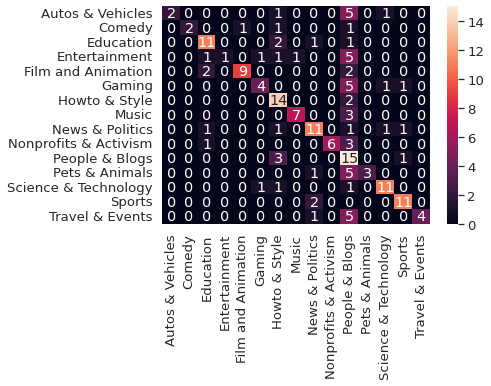

In [18]:
from sklearn.naive_bayes import MultinomialNB
rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=(1,2), max_features = 5000)), 
                   ('NB', MultinomialNB())])
rPipeTf.fit(X_train,y_train)

y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)

print(classification_report(y_test, y_pred_rTf))


cf_rTf = confusion_matrix(y_test, y_pred_rTf)

df_cm = pd.DataFrame(cf_rTf, le.classes_, le.classes_)
sn.set(font_scale=1.2) 
sn.heatmap(df_cm, annot=True, fmt='d') 
plt.show()

### SVM

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


N_GRAMS = (1,2)
print(f"Ngram range = {N_GRAMS}")

rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=N_GRAMS, max_features = 20000)), 
                   ('svc', LinearSVC(random_state=42,max_iter=1000, tol=1e-3))])
rPipeTf.fit(X_train,y_train)

from sklearn.metrics import f1_score

y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)



N_GRAMS = (1,3)
print(f"Ngram range = {N_GRAMS}")

rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=N_GRAMS, max_features = 20000)), 
                   ('svc', LinearSVC(random_state=42,max_iter=1000, tol=1e-3))])
rPipeTf.fit(X_train,y_train)

y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)



N_GRAMS = (2,3)
print(f"Ngram range = {N_GRAMS}")

rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=N_GRAMS, max_features = 20000)), 
                   ('svc', LinearSVC(random_state=42,max_iter=1000, tol=1e-3))])
rPipeTf.fit(X_train,y_train)

y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)


Ngram range = (1, 2)
F1 macro: 72.58175889339326
Accuracy: 72.77777777777777
Ngram range = (1, 3)
F1 macro: 72.92347874008514
Accuracy: 73.33333333333333
Ngram range = (2, 3)
F1 macro: 66.44532415946244
Accuracy: 66.11111111111111


Mô hình cho ra kết quả tốt nhất ở cả 2 độ đo F1 macro và Accuracy là mô hình sử dụng phương pháp vector hóa với giới hạn ngram range = (1,3)

F1 macro: 72.92347874008514
Accuracy: 73.33333333333333
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       1.00      0.60      0.75         5
           2       0.64      0.60      0.62        15
           3       0.67      0.40      0.50        10
           4       0.85      0.85      0.85        13
           5       0.75      0.82      0.78        11
           6       0.74      0.88      0.80        16
           7       0.62      0.80      0.70        10
           8       0.83      0.62      0.71        16
           9       1.00      0.80      0.89        10
          10       0.57      0.68      0.62        19
          11       0.88      0.78      0.82         9
          12       0.68      0.93      0.79        14
          13       0.81      1.00      0.90        13
          14       0.83      0.50      0.62        10

    accuracy                           0.73       180
   macro avg       0.77 

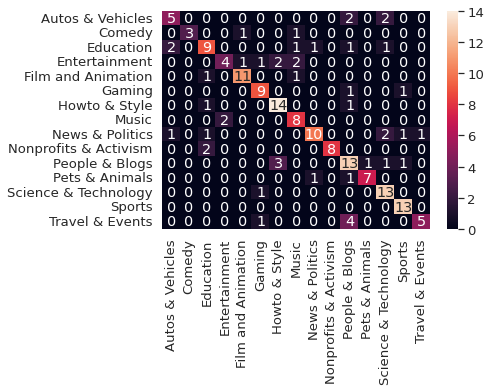

In [23]:

rPipeTf = Pipeline([('transformer', TfidfVectorizer(ngram_range=(1,3), max_features = 20000)), 
                   ('svc', LinearSVC(random_state=42,max_iter=1000, tol=1e-3))])
rPipeTf.fit(X_train,y_train)


y_pred_rTf = rPipeTf.predict(X_test)
print("F1 macro:", f1_score(y_test, y_pred_rTf, average='macro')*100)
print("Accuracy:", rPipeTf.score(X_test,y_test)*100)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rTf))


from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cf_rTf = confusion_matrix(y_test, y_pred_rTf)

df_cm = pd.DataFrame(cf_rTf, le.classes_, le.classes_)
sn.set(font_scale=1.2) 
sn.heatmap(df_cm, annot=True, fmt='d') 
plt.show()

## Lưu mô hình

In [24]:
import pickle

with open('/content/drive/MyDrive/DoAnTienXuLiDuLieu/Source code/SVC_model', 'wb') as files:
    pickle.dump(rPipeTf, files)

In [25]:
import pickle

f = open('/content/drive/MyDrive/DoAnTienXuLiDuLieu/Source code/SVC_model', 'rb')
lr = pickle.load(f)

In [30]:
le.classes_[lr.predict(["MỘT NGÀY PHIÊN DỊCH CABIN NHƯ THẾ NÀO?"])]

array(['People & Blogs'], dtype=object)